<a href="https://colab.research.google.com/github/Jesslyn26/IS660_Stats_thinking_in_Data_Science/blob/main/IS630_G2T3_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting onto gdrive to get dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import necessary files

In [ ]:
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.stats import chisquare, chi2, chi2_contingency
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# ensure the team project drive is placed under your own drive or the below code will generate error
data = pd.read_excel('/content/drive/MyDrive/IS630_G2T3_Project/fake_job_postings.xlsx')

df = pd.DataFrame(data)
df_clean = df.copy()

In [ ]:
# if u can see this output means everything all good :D
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

# Data Cleaning

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6327 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17871 non-null  object
 7   requirements         15148 non-null  object
 8   benefits             10638 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
# Check for missing values
print('Null Values in Each Column:\n')
df.isnull().sum()

Null Values in Each Column:



,0
job_id,0
title,0
location,346
department,11553
salary_range,15012
company_profile,3308
description,9
requirements,2732
benefits,7242
telecommuting,0


In [ ]:
# View percentage of missing values per column
print('Percent of Null Values in Each Column:\n')
df.isnull().mean() * 100

Percent of Null Values in Each Column:



,0
job_id,0.000000
title,0.000000
location,1.935123
department,64.614094
salary_range,83.959732
company_profile,18.501119
description,0.050336
requirements,15.279642
benefits,40.503356
telecommuting,0.000000


In [ ]:
df_clean.isnull().sum()

,0
job_id,0
title,0
location,346
department,11553
salary_range,15012
company_profile,3308
description,9
requirements,2732
benefits,7242
telecommuting,0


In [ ]:
# For text columns, replace missing values with Missing
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df_clean[text_columns] = df_clean[text_columns].fillna('Unknown')

In [ ]:
# For other categorical columns, replace missing values with relevant placeholders
df_clean.fillna({
    'location': 'Unknown',
    'department': 'Unknown',
    'salary_range': 'Unknown',
    'employment_type': 'Unknown',
    'required_experience': 'Unknown',
    'required_education': 'Unknown',
    'industry': 'Unknown',
    'function': 'Unknown'
}, inplace=True)


In [ ]:
df_clean.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Data Visualisation (Overview)

In [ ]:
# Calculate the total number of job postings
total_postings = len(df_clean)

# Calculate the number of fraudulent postings
fraudulent_postings = df_clean['fraudulent'].value_counts().get(1, 0)

# Calculate the percentage of fraudulent postings
fraud_percentage = (fraudulent_postings / total_postings) * 100

print(f'Total Job Postings: {total_postings}')
print(f'Number of Fraudulent Postings: {fraudulent_postings}')
print(f'Percentage of Fraudulent Postings: {fraud_percentage:.2f}%')

Total Job Postings: 17880
Number of Fraudulent Postings: 866
Percentage of Fraudulent Postings: 4.84%


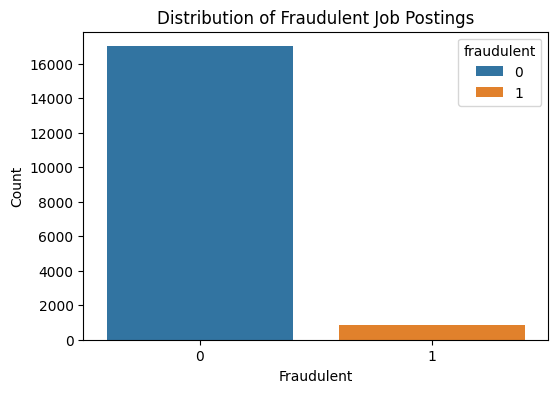

In [ ]:
# Bar plot for fraudulent (target) feature
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df, hue='fraudulent', legend=True)
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Job Postings')
plt.show()

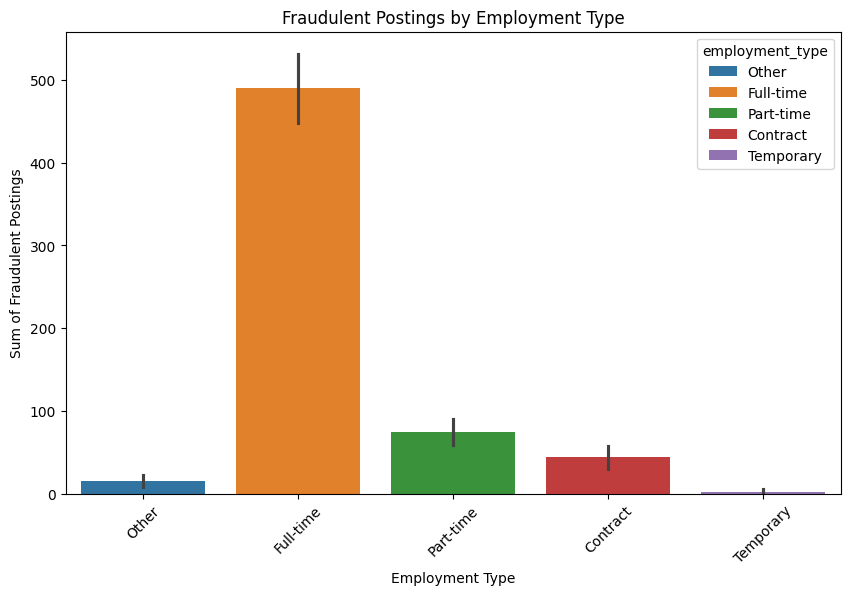

In [ ]:
# Bar plot for employment_type, include colour
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='employment_type', y='fraudulent', estimator=sum, hue='employment_type', legend=True)
plt.title('Fraudulent Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

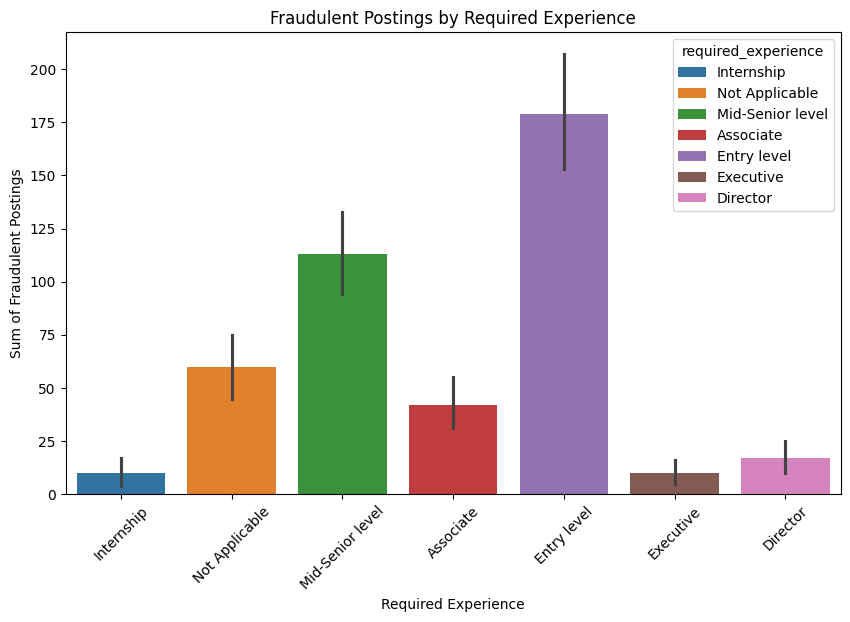

In [ ]:
# Bar plot for required_experience
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='required_experience', y='fraudulent', estimator=sum, hue='required_experience', legend=True)
plt.title('Fraudulent Postings by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

### Fraud Jobs based on Country

In [ ]:
total_fraudalent = df.fraudulent.value_counts()
print(total_fraudalent)

fraudulent
0    17014
1      866
Name: count, dtype: int64


In [ ]:
# split location text into country and location (country is right before first, anything after is location)
df_clean['location'] = df_clean['location'].astype(str)
df_clean['country'] = df_clean['location'].apply(lambda x: x.split(',')[0].strip())

In [ ]:
# country checks
unique_countries = df_clean['country'].unique()
print(len(unique_countries))
print(unique_countries)

91
['US' 'NZ' 'DE' 'GB' 'AU' 'SG' 'IL' 'AE' 'CA' 'IN' 'EG' 'PL' 'GR'
 'Unknown' 'PK' 'BE' 'BR' 'SA' 'DK' 'RU' 'ZA' 'CY' 'HK' 'TR' 'IE' 'LT'
 'JP' 'NL' 'AT' 'KR' 'FR' 'EE' 'TH' 'PA' 'KE' 'MU' 'MX' 'RO' 'MY' 'FI'
 'CN' 'ES' 'SE' 'CL' 'UA' 'QA' 'IT' 'LV' 'IQ' 'BG' 'PH' 'CZ' 'VI' 'MT'
 'HU' 'BD' 'KW' 'LU' 'NG' 'RS' 'BY' 'VN' 'ID' 'ZM' 'NO' 'BH' 'UG' 'CH'
 'TT' 'SD' 'SK' 'AR' 'TW' 'PT' 'PE' 'CO' 'IS' 'SI' 'MA' 'AM' 'TN' 'GH'
 'AL' 'HR' 'CM' 'SV' 'NI' 'LK' 'JM' 'KZ' 'KH']


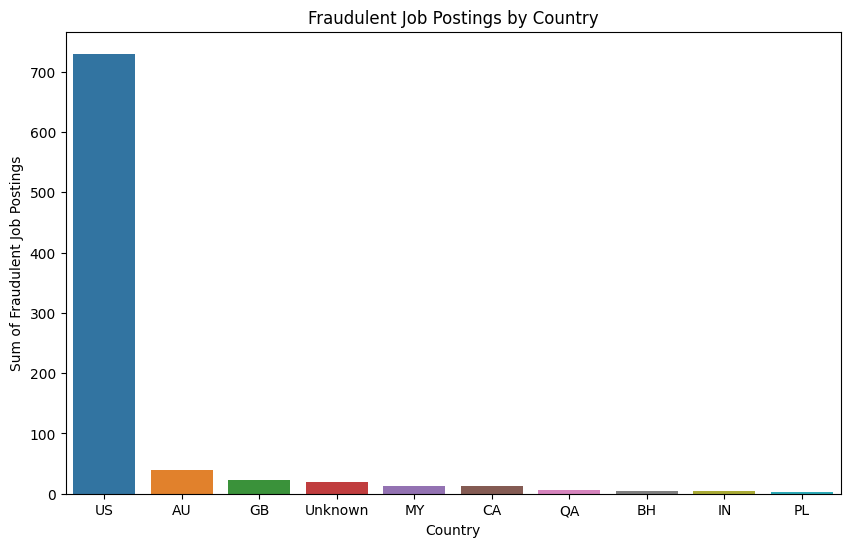

In [ ]:
# Check fraud jobs are populated in which country
df_clean['location'] = df_clean['location'].astype(str)
df_clean['country'] = df_clean['location'].apply(lambda x: x.split(',')[0].strip())
fraudulent_country = df_clean[df_clean['fraudulent'] == 1]['country'].value_counts().head(10)
fraudulent_country

# plotting the top 10 country for better visualization
fraudulent_country = fraudulent_country.reset_index()  # Convert Series to DataFrame
fraudulent_country.columns = ['country', 'count']
plt.figure(figsize=(10, 6))

sns.barplot(data=fraudulent_country, x='country', y='count', estimator=sum, hue='country', legend=False)
plt.title('Fraudulent Job Postings by Country')
plt.xlabel('Country')
plt.ylabel('Sum of Fraudulent Job Postings')
plt.show()

Due to most fraudulent job posting clutter in one certain country. We will choose the country with the most fraudulent job posting:  __US__

__Goal__: What are the characteristic of fraudalent jobs

# General Analysis

## __Q1: The general salary range between fake and real job post__

In [ ]:
# filter records for fake jobs's salary range and then filter for missing values

fake = df_clean[df_clean['fraudulent'] == 1]
fake_filtered = fake[~fake['salary_range'].str.contains('Unknown', case=False, na=False)]


start_salary_fake = fake_filtered['salary_range'].str.split('-', expand=True)[0].astype(float)
end_salary_fake = fake_filtered['salary_range'].str.split('-', expand=True)[1].astype(float)
fake_mean = start_salary_fake + end_salary_fake / 2
fake_avg = fake_mean.mean()
fake_median = fake_mean.median()
fake_std = round(fake_mean, 2).std()
fake_mode = fake_mean.mode()
fake_total = len(fake_filtered)
print(fake_mean)
print("fake jobs summary statstics:")
print(f"filtered fake jobs with salary range: {fake_total} over {len(fake)}, percentage: {(fake_total/len(fake)) * 100}")
print(f"mean: {fake_avg}")
print(f"median: {fake_median}")
print(f"standard deviation: {fake_std}")
print(f"mode: {fake_mode}")



real = df_clean[df_clean['fraudulent'] == 0]['salary_range']
real_filtered = real[~real.str.contains('Unknown', case=False, na=False)]
start_salary_real = real_filtered.str.split('-', expand=True)[0].astype(float)
end_salary_real = real_filtered.str.split('-', expand=True)[1].astype(float)
real_mean = end_salary_real + start_salary_real / 2
real_avg = real_mean.mean()
real_median = real_mean.median()
real_std = real_mean.std()
real_mode = real_mean.mode()
real_total = len(real_filtered)
print("real jobs summary statstics:")
print(f"filtered real jobs with salary range: {real_total} over {len(real)}, percentage: {(real_total/len(real)) * 100}")
print(f"mean: {real_avg}")
print(f"median: {real_median}")
print(f"standard deviation: {real_std}")
print(f"mode: {real_mode}")




98       152500.0
215      152500.0
357       71500.0
493       37440.0
628      102500.0
           ...   
17812    202500.0
17813     55000.0
17816     30000.0
17820     47500.0
17823     15000.0
Length: 223, dtype: float64
fake jobs summary statstics:
filtered fake jobs with salary range: 223 over 866, percentage: 25.75057736720554
mean: 146379.01351351352
median: 55000.0
standard deviation: 719446.793856529
mode: 0    55000.0
dtype: float64
real jobs summary statstics:
filtered real jobs with salary range: 2645 over 17014, percentage: 15.546020923944987
mean: 1144717.798587247
median: 70000.0
standard deviation: 37390879.32917907
mode: 0    0.0
dtype: float64


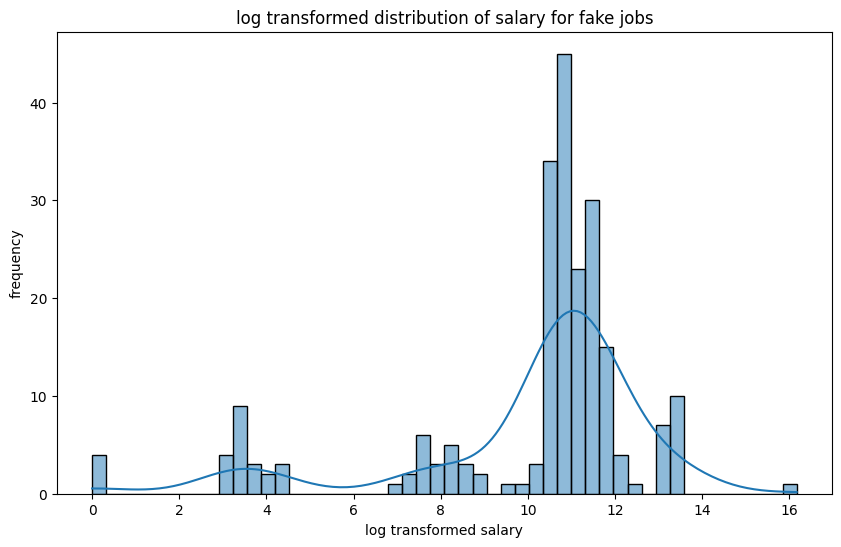

In [ ]:
# log transformed graph for fake jobs is generated to see the distribution of the salary since the data was too skewed to the right
plt.figure(figsize=(10, 6))

sns.histplot(np.log1p(fake_mean), bins=50, kde=True)
plt.xlabel('log transformed salary')
plt.ylabel('frequency')
plt.title('log transformed distribution of salary for fake jobs')
plt.show()

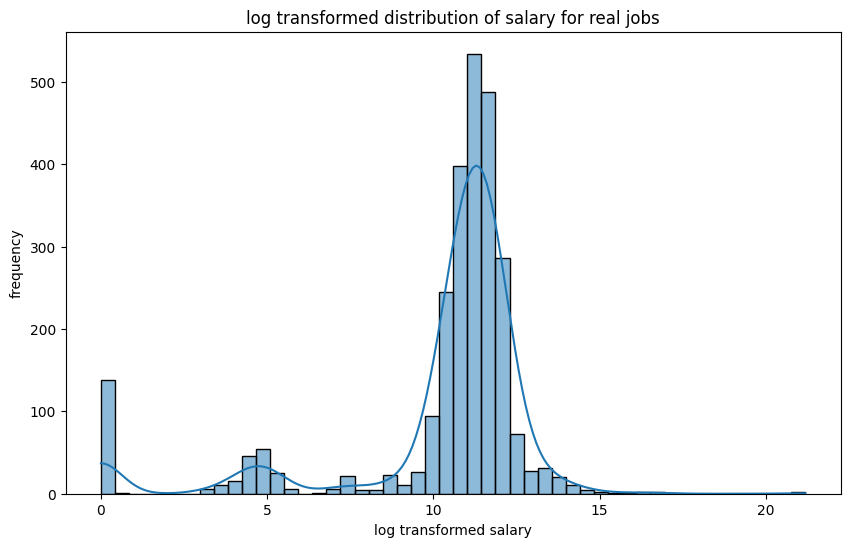

In [ ]:
# log transformation graph is generated for the real jobs
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(real_mean), bins=50, kde=True)
plt.xlabel('log transformed salary')
plt.ylabel('frequency')
plt.title('log transformed distribution of salary for real jobs')
plt.show()

<p>Apply CLT and standardization as sample size is > 30 </p>




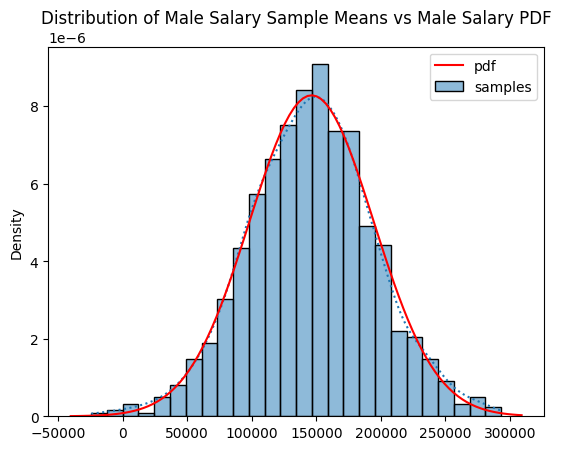

In [ ]:
sample_fake = stats.norm(fake_avg, fake_std).rvs(size=(1000, fake_total)).mean(axis=1)

ax = sns.histplot(data = sample_fake, stat = 'density', kde = True, line_kws = {'linestyle': ':'}, label = 'samples')

# Calculate the pdf of the sampling distribution
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
std_error = fake_std/np.sqrt(len(fake_mean))
y_pdf = stats.norm(fake_avg, std_error).pdf(x_pdf)

ax.plot(x_pdf, y_pdf, 'r', label = 'pdf')
ax.set_title('Distribution of Male Salary Sample Means vs Male Salary PDF')
ax.legend()
plt.show()


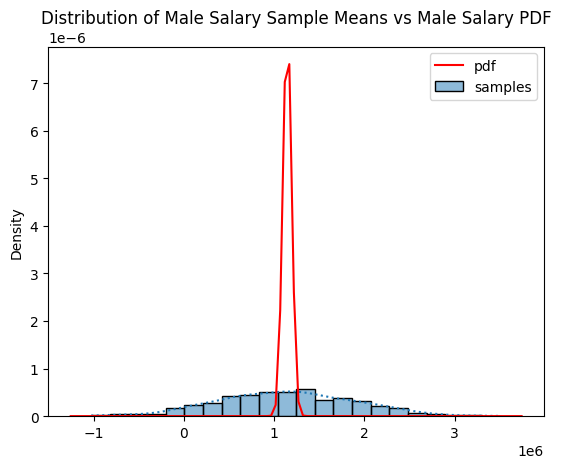

In [ ]:
sample_real = stats.norm(real_avg, real_std).rvs(size=(1000, real_total)).mean(axis=1)

ax = sns.histplot(data = sample_real, stat = 'density', kde = True, line_kws = {'linestyle': ':'}, label = 'samples')

# Calculate the pdf of the sampling distribution
x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
std_errors = real_std/np.sqrt(len(real_mean))
y_pdf = stats.norm(real_avg, std_error).pdf(x_pdf)

ax.plot(x_pdf, y_pdf, 'r', label = 'pdf')
ax.set_title('Distribution of Male Salary Sample Means vs Male Salary PDF')
ax.legend()
plt.show()


###Hypothesis Testing using t-test#
<p> H0: there's no significant difference in the means of salary between fake jobs and real jobs</p>
<p> H1: there is significant difference in the means of salary between fake jobs and real jobs</p>

In [ ]:
# construct critical value, t score and p value
alpha = 0.05
pooled_var = ((fake_total- 1) * fake_std ** 2 + (real_total - 1) * real_std ** 2) / ((fake_total - 1)+(real_total - 1))
t_score = (fake_avg - real_avg) / (pooled_var * (1 / fake_total + 1 / real_total)) ** 0.5
critical_val = stats.t.ppf(1 - alpha / 2, df = fake_total + real_total - 2)
p_value = 2 * stats.t.sf(abs(t_score), df = fake_total + real_total - 2)

# test using t-test for hypothesis testing
print(f"t-score: {t_score}")
print(f"compare critical value and p-value: -{critical_val}, {critical_val}")
print(f"p-value: {p_value}")


t-score: -0.398647072130561
compare critical value and p-value: -1.9607920572417614, 1.9607920572417614
p-value: 0.690182969211891


<p>Using both critical value and p value, yields the same results, the null hypothesis is not rejected since there'e not enough evidence to conclude that the means of salary of fake jobs and real jobs are significantly different </p>

## __Q2.Are fake job posts more likely to require telecommuting than real job?__

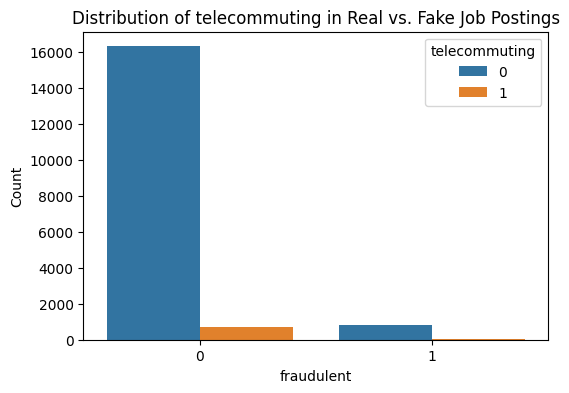

In [ ]:
# Bar plot for fraudulent by telecommuting feature
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df, hue='telecommuting', legend=True)
plt.xlabel('fraudulent')
plt.ylabel('Count')
plt.title('Distribution of telecommuting in Real vs. Fake Job Postings')
plt.show()

In [ ]:
# Create a contingency table for telecommuting across fraudulent
contingency_table = pd.crosstab(df_clean['fraudulent'], df_clean['telecommuting'])

chi_squared, p, dof, expected = chi2_contingency(contingency_table)

# Calculate the proportions of telecommuting jobs for fraudulent and non-fraudulent postings
prop_fake_telecommuting = contingency_table.loc[1, 1] / contingency_table.loc[1].sum()
prop_real_telecommuting = contingency_table.loc[0, 1] / contingency_table.loc[0].sum()

print("\nCross Tabulation between Telecommuting and Fraudulent Jobs:\n", contingency_table)

print('Proportion of Telecommuting in Real Posts: %.4f' % prop_real_telecommuting)
print('Proportion of Telecommuting in Fake Posts: %.4f' % prop_fake_telecommuting)



Cross Tabulation between Telecommuting and Fraudulent Jobs:
 telecommuting      0    1
fraudulent               
0              16311  703
1                802   64
Proportion of Telecommuting in Real Posts: 0.0413
Proportion of Telecommuting in Fake Posts: 0.0739


__Chi-square test__

Hypotheses

H0: There is no significant difference in the proportion of telecommuting jobs between fake and real job posts.

H1: There is a significant difference in the proportion of telecommuting jobs between fake and real job posts.

In [ ]:
print('Chi-squared: %.3f' % chi_squared)
print('Degrees of freedom: %.3f' % dof)
print('p-value: %.6f' % p)

Chi-squared: 20.524
Degrees of freedom: 1.000
p-value: 0.000006


__Since p-value= 0.000006 <0.05, we reject the null hyphothesis.__
This means that we have enough evidence to show a significant difference in the proportion of telecommuting between fake jobs and real jobs.

**Conclusion:**

 __Fake jobs were more likely to offer telecommuting compared to real jobs :__

 Fake jobs have a higher proportion of telecommuting  (7.39%) compared to real jobs(4.13%), suggesting that fake jobs tend to offer telecommuting more often than real ones.

In [ ]:
# Calculate standardized residuals
standardized_residuals = (contingency_table - expected) / np.sqrt(expected)

print("Standardized Residuals:\n", standardized_residuals)

Standardized Residuals:
 telecommuting         0         1
fraudulent                       
0              0.210417 -0.993906
1             -0.932662  4.405442



**Conclusion :**

-There is no significant difference between observed and expected values for real job posts with and without telecommuting.

-There is a significant difference for fake job posts with telecommuting, where the observed count is much higher than expected while there is no significant difference for fake job posts without telecommuting, __indicating that fake job posts are far more likely to offer telecommuting__

## __Q3.Does having questions in a job post determine how real a job is?__

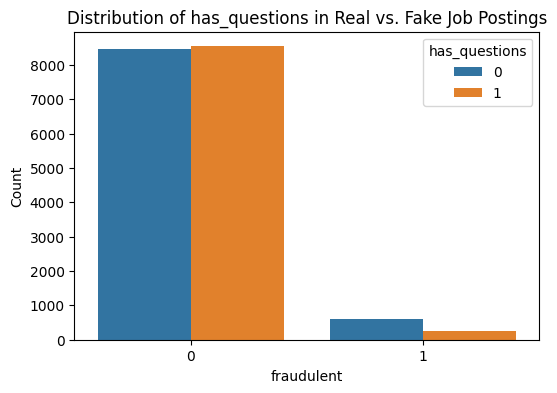

In [ ]:
# Bar plot for fraudulent by has_question
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df, hue='has_questions', legend=True)
plt.xlabel('fraudulent')
plt.ylabel('Count')
plt.title('Distribution of has_questions in Real vs. Fake Job Postings')
plt.show()

In [ ]:

# Create a contingency table for has_questions across fraudulent
contingency_table = pd.crosstab(df['fraudulent'], df['has_questions'])

chi_squared, p, dof, expected = chi2_contingency(contingency_table)

# Calculate the proportions of job posts with questions for fraudulent and non-fraudulent postings
prop_fake_questions = contingency_table.loc[1, 1] / contingency_table.loc[1].sum()
prop_real_questions = contingency_table.loc[0, 1] / contingency_table.loc[0].sum()

print("\nCross Tabulation between Has_questions and Fraudulent Jobs:\n", contingency_table)

print('Proportion of Has_questions in Real Posts: %.4f' % prop_real_questions)
print('Proportion of Has_questions in Fake Posts: %.4f' % prop_fake_questions)



Cross Tabulation between Has_questions and Fraudulent Jobs:
 has_questions     0     1
fraudulent               
0              8472  8542
1               616   250
Proportion of Has_questions in Real Posts: 0.5021
Proportion of Has_questions in Fake Posts: 0.2887


__Chi-square test__

Hypotheses

H0: There is no significant difference in the proportion of has_questions between fake and real job posts.

H1: There is a significant difference in the proportion of has_questions between fake and real job posts.

In [ ]:
print('Chi-squared: %.3f' % chi_squared)
print('Degrees of freedom: %.3f' % dof)
print('p-value: %.6f' % p)

Chi-squared: 149.260
Degrees of freedom: 1.000
p-value: 0.000000


__Since p-value <0.05, we reject the null hyphothesis.__ This means that we have enough evidence to show a significant difference in the proportion of has_questions between fake jobs and real jobs.

__Conclusion:__

 Real Job Posts More Likely to Have Questions: Real job posts (50.21%) are significantly more likely to include  questions compared to fake job posts (28.87%).

In [ ]:
# Calculate standardized residuals
standardized_residuals = (contingency_table - expected) / np.sqrt(expected)

print("Standardized Residuals:\n", standardized_residuals)

Standardized Residuals:
 has_questions         0         1
fraudulent                       
0             -1.890792  1.922357
1              8.380849 -8.520760


**Conclusion:**

-Real jobs without questions are slightly lower than expected while real jobs with questions are slightly higher than expected.

-Fake jobs without questions are much higher than expected whie fake jobs with questions are much lower than expected.

__Overall,  fake jobs are significantly less likely to include questions, whereas real jobs are more likely to include them.__

## __Q4.Does having company logo in a job post determine how real a job is?__

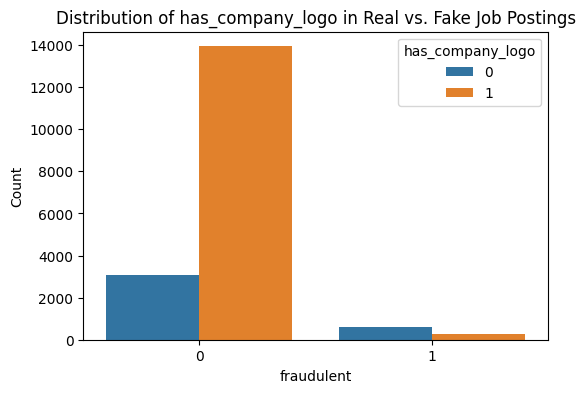

In [ ]:
# Bar plot for fraudulent by has_company_logo
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df, hue='has_company_logo', legend=True)
plt.xlabel('fraudulent')
plt.ylabel('Count')
plt.title('Distribution of has_company_logo in Real vs. Fake Job Postings')
plt.show()

In [ ]:
# Create a contingency table for has_company_logo across fraudulent
contingency_table = pd.crosstab(df['fraudulent'], df['has_company_logo'])

chi_squared, p, dof, expected = chi2_contingency(contingency_table)

# Calculate the proportions of job posts with company logo for fraudulent and non-fraudulent postings
prop_fake_questions = contingency_table.loc[1, 1] / contingency_table.loc[1].sum()
prop_real_questions = contingency_table.loc[0, 1] / contingency_table.loc[0].sum()

print("\nCross Tabulation between Has_company_logo and Fraudulent Jobs:\n", contingency_table)

print('Proportion of Has_company_logo in Real Posts: %.4f' % prop_real_questions)
print('Proportion of Has_company_logo in Fake Posts: %.4f' % prop_fake_questions)



Cross Tabulation between Has_company_logo and Fraudulent Jobs:
 has_company_logo     0      1
fraudulent                   
0                 3077  13937
1                  583    283
Proportion of Has_company_logo in Real Posts: 0.8191
Proportion of Has_company_logo in Fake Posts: 0.3268


__Chi-square test__

Hypotheses

H0: There is no significant difference in the proportion of has_company_logo between fake and real job posts.

H1: There is a significant difference in the proportion of has_company_logo between fake and real job posts.

In [ ]:
print('Chi-squared: %.3f' % chi_squared)
print('Degrees of freedom: %.3f' % dof)
print('p-value: %.6f' % p)

Chi-squared: 1224.064
Degrees of freedom: 1.000
p-value: 0.000000


__Since p-value <0.05, we reject the null hyphothesis.__ This means that we have enough evidence to show a significant difference in the proportion of has_company_logo between fake jobs and real jobs.

__Conclusion:__

 Real Job Posts More Likely to Have Company Logo: Real job posts (81.91%) are significantly more likely to include company logo compared to fake job posts (32.68%).

In [ ]:
# Calculate standardized residuals
standardized_residuals = (contingency_table - expected) / np.sqrt(expected)

print("Standardized Residuals:\n", standardized_residuals)

Standardized Residuals:
 has_company_logo          0          1
fraudulent                            
0                 -6.875096   3.487944
1                 30.473549 -15.460153


__Conclusion:__

-Real jobs without a company logo are significantly lower than expected, while real jobs with a company logo are higher than expected.

-Fake jobs without a company logo are much higher than expected, whereas fake jobs with a company logo are much lower than expected.

__Overall, fake jobs are significantly less likely to include a company logo, whereas real jobs are more likely to display company logo.__

## **Q5. Are there more fake jobs posted in certain industries or functions than others?**

Due to both industry and function being categorical variables, ANOVA is not an appropriate test. In order to know which industries and functions have more fake jobs posts than others, frequency of fraudulent jobs in industry and function are performed.

In [ ]:
# Filter the data to caculate fraudulent job postings
fraud_data = df_clean[df_clean['fraudulent']== 1]

# Get the top 5 industries
top_5_industries = fraud_data['industry'].value_counts(dropna=False).head(5)
print("Top 5 Industries with most fraudulent jobs:")
print(top_5_industries)

# Get the top 5 functions
top_5_functions = fraud_data['function'].value_counts(dropna=False).head(5)
print("\nTop 5 Functions with most fraudulent jobs:")
print(top_5_functions)

# Get the top 5 industry-function combinations
top_5_industry_function = fraud_data.groupby(['industry', 'function']).size().sort_values(ascending=False).head(5)
print("\nTop 5 Industry-Function Combinations with most fraudulent jobs:")
print(top_5_industry_function)


Top 5 Industries with most fraudulent jobs:
industry
Unknown                      275
Oil & Energy                 109
Accounting                    57
Hospital & Health Care        51
Marketing and Advertising     45
Name: count, dtype: int64

Top 5 Functions with most fraudulent jobs:
function
Unknown             337
Administrative      119
Engineering         113
Customer Service     67
Sales                41
Name: count, dtype: int64

Top 5 Industry-Function Combinations with most fraudulent jobs:
industry                function      
Unknown                 Unknown           236
Oil & Energy            Engineering        61
Hospital & Health Care  Unknown            32
Accounting              Administrative     30
Oil & Energy            Other              26
dtype: int64


Text(0, 0.5, 'Number of Fraudulent Jobs')

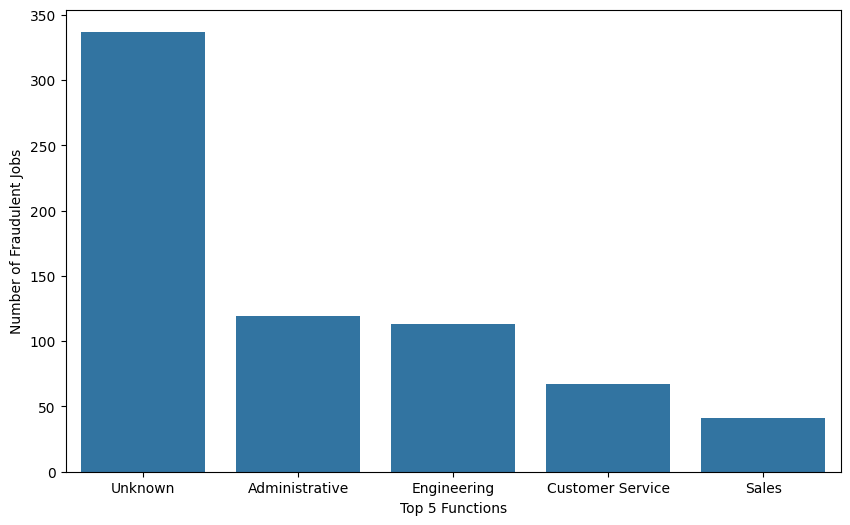

In [ ]:
# barchart to show fraud by top 5 functions
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_functions.index, y=top_5_functions.values)
plt.xlabel('Top 5 Functions')
plt.ylabel('Number of Fraudulent Jobs')

In [ ]:
df_compare = pd.DataFrame({
    'Top 5 Functions': top_5_functions.index,
    'Fraud Jobs': top_5_functions.values,
})
df_compare

,Top 5 Functions,Fraud Jobs
0,Unknown,337
1,Administrative,119
2,Engineering,113
3,Customer Service,67
4,Sales,41


In [ ]:
df_compare = pd.DataFrame({
    'Top 5 Industries': top_5_industries.index,
    'Fraud Jobs': top_5_industries.values,
})
df_compare

,Top 5 Industries,Fraud Jobs
0,Unknown,275
1,Oil & Energy,109
2,Accounting,57
3,Hospital & Health Care,51
4,Marketing and Advertising,45


In [ ]:
df_compare = pd.DataFrame({
    'Top 5 Industry-Function Combinations': top_5_industry_function.index,
    'Fraud Jobs': top_5_industry_function.values,
})
df_compare

,Top 5 Industry-Function Combinations,Fraud Jobs
0,"(Unknown, Unknown)",236
1,"(Oil & Energy, Engineering)",61
2,"(Hospital & Health Care, Unknown)",32
3,"(Accounting, Administrative)",30
4,"(Oil & Energy, Other)",26


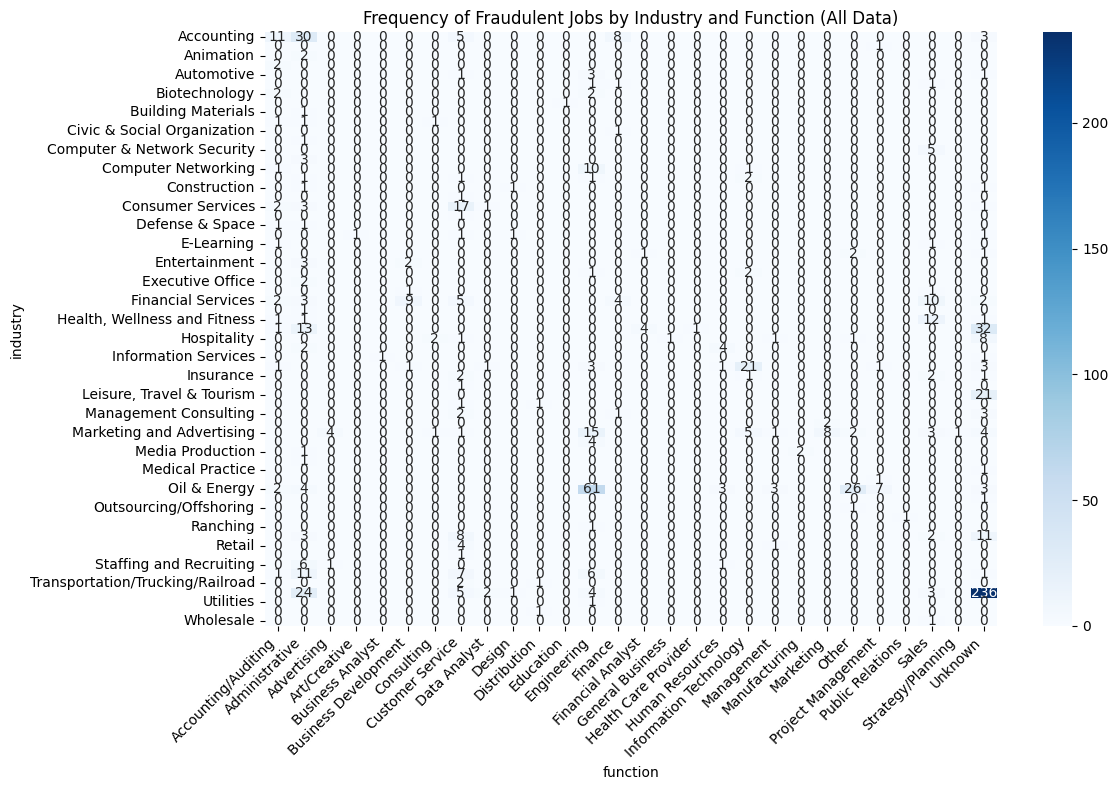

In [ ]:
freq_table = fraud_data.groupby(['industry', 'function']).size().unstack(fill_value=0)
freq_table

# Plot a heatmap to visualize the frequency of fraudulent jobs by industry-function combination
plt.figure(figsize=(12, 8))
sns.heatmap(freq_table, annot=True, cmap='Blues', fmt='g')
plt.title('Frequency of Fraudulent Jobs by Industry and Function (All Data)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##  Q6. Do fake job posts tend to target less experienced or less educated applicants?

In [ ]:
# regroup some category
# Create a dictionary to map categories to broader categories

# Example mapping for experience levels
experience_mapping = {
    'Entry level': 1,  # low
    'Internship': 1,   # low
    'Associate': 2,    # medium
    'Mid-Senior level': 3,  # medium
    'Executive': 3,   # high
    'Director': 3,    # high
    'Unknown': 0,
    'Not Applicable': 0,
    'nan': 0
}

# Example mapping for education levels
education_mapping = {
    'High School or equivalent': 1,
    "Some High School Coursework": 1,
    'Vocational - HS Diploma': 1,
    'Vocational': 2,
    'Some College Coursework Completed': 2,
    "Bachelor's Degree": 3,
    'Associate Degree': 3,
    "Master's Degree": 4,
    'Doctorate': 5,
    'Professional': 5,
    'Unknown': 0,
    'Unspecified':0,
    'nan': 0
}



# Apply mapping on required_education
df_clean['encoded_experience'] = df_clean['required_experience'].map(experience_mapping).fillna(1).astype(int)
df_clean['encoded_education'] = df_clean['required_education'].map(education_mapping).fillna(1).astype(int)


### Chi-Square test

<Axes: >

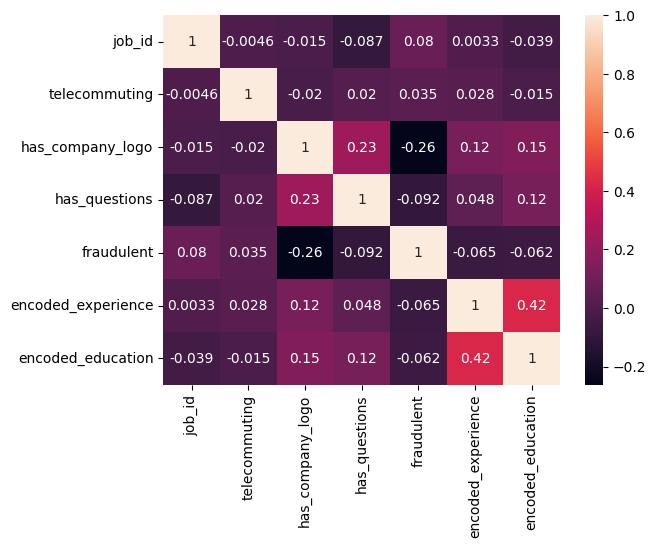

In [ ]:
# Plot Correlation
correlation_matrix = df_clean.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True)

H<sub>0</sub>: there is no association between type of job posting (fraudulent or non-fraudulent and education requirement/ experience requirement

H<sub>1</sub>: there is an association between type of job posting (fraudulent or non-fraudulent and education requirement/ experience requirement

In [ ]:
# for encoded education
contingency_education = pd.crosstab(df_clean['encoded_education'], df_clean['fraudulent'])

# Perform Chi-Square Test
chi2, p, dof, expected_education = chi2_contingency(contingency_education, correction=True)

# Interpret p-value
if p < 0.05:
    print("There is a significant association between encoded_education and the fraudulence.")
else:
    print("There is no significant association between encoded_education and the fraudulence.")

print("\nChi-square test for Encoded Education:")
print("Chi2 Statistic:", round(chi2, 3))
print("p-value:", round(p, 3))

# obs-expected
print("Expected in education: \n", expected_education)
print("Difference in education: \n", contingency_education - expected_education)

# get residuals (values >2 or <-2 indicate a significant association)
standardised_residuals = (contingency_education - expected_education) / np.sqrt(expected_education)
print("\nStandardised Residuals:\n", standardised_residuals)


There is a significant association between encoded_education and the fraudulence.

Chi-square test for Encoded Education:
Chi2 Statistic: 203.862
p-value: 0.0
Expected in education: 
 [[9.04178009e+03 4.60219911e+02]
 [2.18098926e+03 1.11010738e+02]
 [1.43686465e+02 7.31353468e+00]
 [5.15653613e+03 2.62463870e+02]
 [3.95851454e+02 2.01485459e+01]
 [9.51565996e+01 4.84340045e+00]]
Difference in education: 
 fraudulent                  0           1
encoded_education                        
0                  -51.780089   51.780089
1                  -97.989262   97.989262
2                    4.313535   -4.313535
3                  156.463870 -156.463870
4                  -10.851454   10.851454
5                   -0.156600    0.156600

Standardised Residuals:
 fraudulent                0         1
encoded_education                    
0                 -0.544548  2.413682
1                 -2.098223  9.300279
2                  0.359853 -1.595033
3                  2.178889 -9.657824


Due to some expected value less than 5, we can conclude that education has no significant towards job posting being fraud or not

In [ ]:
# for encoded experience
contingency_experience = pd.crosstab(df_clean['encoded_experience'], df_clean['fraudulent'])

# Perform Chi-Square Test
chi, p, dof, expected_experience = chi2_contingency(contingency_experience, correction=True)

# Interpret p-value
if p < 0.05:
    print("There is a significant association between encoded_experience and the fraudulence.")
else:
    print("There is no significant association between encoded_experience and the fraudulence.")

# Print results
print("Chi-square test for Encoded Experience:")
print("Chi2 Statistic:", round(chi, 3))
print("p-value:", round(p, 3))
# print(dof)

# obs-expected
print("Expected in experience: \n", expected_experience)
print("Difference in experience: \n", contingency_experience - expected_experience)

# get residuals (values >2 or <-2 indicate a significant association)
standardised_residuals = (contingency_experience - expected_experience) / np.sqrt(expected_experience)
print("\nStandardised Residuals:\n", standardised_residuals)

There is a significant association between encoded_experience and the fraudulence.
Chi-square test for Encoded Experience:
Chi2 Statistic: 107.447
p-value: 0.0
Expected in experience: 
 [[7770.48791946  395.51208054]
 [2928.92013423  149.07986577]
 [2185.74709172  111.25290828]
 [4128.84485459  210.15514541]]
Difference in experience: 
 fraudulent                  0          1
encoded_experience                      
0                  -99.487919  99.487919
1                  -39.920134  39.920134
2                   69.252908 -69.252908
3                   70.155145 -70.155145

Standardised Residuals:
 fraudulent                 0         1
encoded_experience                    
0                  -1.128616  5.002539
1                  -0.737629  3.269509
2                   1.481283 -6.565720
3                   1.091805 -4.839378


P value for expereince are lower than 0.05. Meaning we reject the null hypothesis for both education and experience, hence there is sufficient evidence to prove that there is association between required education and job fraudulence. There is also significant association between required experience and job fraudulence.

## __Q7.Is the employment type (e.g., part-time vs. full-time) different between fake and real job posts?__

In [ ]:
df_clean.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'country', 'encoded_experience', 'encoded_education'],
      dtype='object')

In [ ]:
# employment_type
employment_counts = df_clean['employment_type'].value_counts()
employment_percent = df_clean['employment_type'].value_counts(normalize=True) * 100

print("Employment Type Counts:\n", employment_counts)
print("\nEmployment Type Percentages:\n", employment_percent)

# fraudulent
fraudulent_counts = df_clean['fraudulent'].value_counts()
fraudulent_percent = df_clean['fraudulent'].value_counts(normalize=True) * 100

print("\nFraudulent Job Counts:\n", fraudulent_counts)
print("\nFraudulent Job Percentages:\n", fraudulent_percent)

# cross table
cross_tab = pd.crosstab(df_clean['employment_type'], df_clean['fraudulent'], margins=True)

print("\nCross Tabulation between Employment Type and Fraudulent Jobs:\n", cross_tab)

Employment Type Counts:
 employment_type
Full-time    11620
Unknown       3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

Employment Type Percentages:
 employment_type
Full-time    64.988814
Unknown      19.412752
Contract      8.523490
Part-time     4.457494
Temporary     1.347875
Other         1.269575
Name: proportion, dtype: float64

Fraudulent Job Counts:
 fraudulent
0    17014
1      866
Name: count, dtype: int64

Fraudulent Job Percentages:
 fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64

Cross Tabulation between Employment Type and Fraudulent Jobs:
 fraudulent           0    1    All
employment_type                   
Contract          1480   44   1524
Full-time        11130  490  11620
Other              212   15    227
Part-time          723   74    797
Temporary          239    2    241
Unknown           3230  241   3471
All              17014  866  17880


Chi-square test  

Hypotheses  
H0: There is no significant difference in the distribution of employment types (e.g., part-time vs. full-time) between real and fake job posts.  
H1:There is a significant difference in the distribution of employment types between real and fake job posts.

In [ ]:
# contingency table
contingency_table = pd.crosstab(df_clean['employment_type'], df_clean['fraudulent'])
chi_squared, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-squared: %.3f' % chi_squared)
print('Degrees of freedom: %.3f' % dof)
print('p-value: %.6f' % p)

Chi-squared: 99.829
Degrees of freedom: 5.000
p-value: 0.000000


Since p-value < 0.05 (or 5%), we reject the null hypothesis

Conclusion

1. Fake job posts are more likely to offer part-time jobs than real job posts.
2. Real job posts are more likely to offer full-time and contract based jobs.

In [ ]:
# Calculate standardized residuals
standardized_residuals = (contingency_table - expected) / np.sqrt(expected)

# Results
print("Standardized Residuals:\n", standardized_residuals)

Standardized Residuals:
 fraudulent              0         1
employment_type                    
Contract         0.782888 -3.470117
Full-time        0.692353 -3.068823
Other           -0.272535  1.207999
Part-time       -1.285379  5.697385
Temporary        0.638727 -2.831127
Unknown         -1.268221  5.621330


Conclusion  
1. Contract: Fake job posts offer significantly fewer contract positions than expected, while there is no significant difference for real job posts.
2. Full-time: The difference between observed and expected values for full-time jobs is not significant for both real and fake job posts
3. There is no significant difference in the "Other" employment category for both real and fake job posts.
4. Part-time:  Fake job posts offer significantly more part-time jobs than expected
5. Temporary: Fake job posts offer significantly fewer temporary jobs than expected

In [ ]:
# add dummy variable coloumn in df_clean
df_clean = pd.get_dummies(df_clean, columns = ['employment_type'], drop_first= True, dtype=int)
df_clean.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,function,fraudulent,country,encoded_experience,encoded_education,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_Unknown
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,...,Marketing,0,US,1,0,0,1,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,Customer Service,0,NZ,0,0,1,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,...,Unknown,0,US,0,0,0,0,0,0,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Sales,0,US,3,3,1,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Health Care Provider,0,US,3,3,1,0,0,0,0


## __Q8.Are there any common words among text field columns?__

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

def analyze_ngrams_combined(column_name):
    vectorizer = TfidfVectorizer(ngram_range=(2, 3), max_features=500)  # Adjust n-gram range if needed
    X = vectorizer.fit_transform(df_clean[df_clean['fraudulent'] == 1][column_name])  # Only fraudulent jobs
    tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # get min and max tf-idf values
    min_tfidf = tfidf_df.min().min()
    max_tfidf = tfidf_df.max().max()

    common_phrases = tfidf_df.mean().sort_values(ascending=False)

    # create a table of common phrases with each phrase's min and max tf-idf values
    common_phrases = pd.DataFrame(common_phrases).reset_index()
    common_phrases.columns = ['Phrase', 'tf_idf']

    # add min and max tf-idf values
    common_phrases['min_tf_idf'] = min_tfidf
    common_phrases['max_tf_idf'] = max_tfidf
    return common_phrases


### Find common words in each individual text columns

In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Preprocess text columns individually
df_clean['company_profile_cleaned'] = df_clean['company_profile'].fillna('').apply(preprocess_text)
df_clean['description_cleaned'] = df_clean['description'].fillna('').apply(preprocess_text)
df_clean['requirements_cleaned'] = df_clean['requirements'].fillna('').apply(preprocess_text)
df_clean['benefits_cleaned'] = df_clean['benefits'].fillna('').apply(preprocess_text)

# Function to analyze common n-grams (bigrams and trigrams) in each column
def analyze_ngrams(column_name):
    vectorizer = TfidfVectorizer(ngram_range=(2, 3), max_features=500)  # Adjust n-gram range if needed
    X = vectorizer.fit_transform(df_clean[df_clean['fraudulent'] == 1][column_name])  # Only fraudulent jobs
    tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # get min and max tf-idf values
    min_tfidf = tfidf_df.min().min()
    max_tfidf = tfidf_df.max().max()

    common_phrases = tfidf_df.mean().sort_values(ascending=False)

    # create a table of common phrase with each phrase's min and max tf-idf values
    common_phrases = pd.DataFrame(common_phrases).reset_index()
    common_phrases.columns = ['Phrase', 'tf_idf']

    # add min and max tf-idf values
    common_phrases['min_tf_idf'] = min_tfidf
    common_phrases['max_tf_idf'] = max_tfidf
    return common_phrases


In [ ]:
df_clean.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,encoded_education,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_Unknown,company_profile_cleaned,description_cleaned,requirements_cleaned,benefits_cleaned
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,...,0,0,1,0,0,0,food weve created groundbreaking awardwinning ...,food fastgrowing james beard awardwinning onli...,experience content management systems major pl...,unknown
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,1,0,0,0,0,seconds worlds cloud video production service ...,organised focused vibrant awesomedo passion cu...,expect youyour key responsibility communicate ...,get usthrough part seconds team gainexperience...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,...,0,0,0,0,0,1,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,unknown
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,3,1,0,0,0,0,passion improving quality life geography heart...,company esri – environmental systems research ...,education bachelor ’ master ’ gis business adm...,culture anything corporate—we collaborative cr...
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,3,1,0,0,0,0,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualificationsrn license state texasdiploma ba...,full benefits offered


In [ ]:
# analyse common phrases in 'company_profile' for fraudulent jobs
print("Common phrases in 'company_profile' for fraudulent jobs:")
# analyze_ngrams('company_profile_cleaned').head(10)
analyze_ngrams('company_profile_cleaned').head(10)[['Phrase', 'tf_idf']]

Common phrases in 'company_profile' for fraudulent jobs:


,Phrase,tf_idf
0,real estate,0.024249
1,accion story,0.018476
2,products services,0.011421
3,aptitude staffing,0.009814
4,refined resources,0.008651
5,many different,0.008083
6,savings value,0.007876
7,uhc provista,0.007876
8,vha uhc,0.007876
9,vha uhc provista,0.007876


In [ ]:
# analyse common phrases in 'description' for fraudulent jobs
print("\nCommon phrases in 'description' for fraudulent jobs:")
# analyze_ngrams('description_cleaned').head(10)
analyze_ngrams('description_cleaned').head(10)[['Phrase', 'tf_idf']]


Common phrases in 'description' for fraudulent jobs:


,Phrase,tf_idf
0,customer service,0.056103
1,data entry,0.037947
2,communication skills,0.032121
3,full time,0.031787
4,include limited,0.029662
5,years experience,0.027582
6,team members,0.024677
7,part time,0.024206
8,apply using,0.023637
9,duties assigned,0.021168


In [ ]:
# analyse common phrases in 'requirements' for fraudulent jobs
print("\nCommon phrases in 'requirements' for fraudulent jobs:")
# analyze_ngrams('requirements_cleaned').head(10)
analyze_ngrams('requirements_cleaned').head(10)[['Phrase', 'tf_idf']]


Common phrases in 'requirements' for fraudulent jobs:


,Phrase,tf_idf
0,years experience,0.028510
1,high school,0.028196
2,experience required,0.026687
3,customer service,0.024873
4,school diploma,0.024411
5,communication skills,0.023891
6,computer internet,0.020842
7,high school diploma,0.020237
8,ability work,0.019331
9,attention detail,0.016769


In [ ]:
# analyse common phrases in 'benefits' for fraudulent jobs
print("\nCommon phrases in 'benefits' for fraudulent jobs:")
# analyze_ngrams('benefits_cleaned').head(10)
analyze_ngrams('benefits_cleaned').head(10)[['Phrase', 'tf_idf']]


Common phrases in 'benefits' for fraudulent jobs:


,Phrase,tf_idf
0,benefits package,0.023503
1,paid holidays,0.019597
2,compensation package,0.014631
3,get started,0.012705
4,worklife balance,0.011932
5,package including,0.011719
6,dental life,0.011399
7,health dental,0.011351
8,competitive salary,0.010967
9,competitive compensation,0.010479


## Analyse difference in word count among text fields

In [ ]:
# include length of words for each text column

# Add word count for each text column
df_clean['company_profile_word_count'] = df_clean['company_profile_cleaned'].apply(lambda x: len(x.split()))
df_clean['description_word_count'] = df_clean['description_cleaned'].apply(lambda x: len(x.split()))
df_clean['requirements_word_count'] = df_clean['requirements_cleaned'].apply(lambda x: len(x.split()))
df_clean['benefits_word_count'] = df_clean['benefits_cleaned'].apply(lambda x: len(x.split()))

df_clean.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,employment_type_Temporary,employment_type_Unknown,company_profile_cleaned,description_cleaned,requirements_cleaned,benefits_cleaned,company_profile_word_count,description_word_count,requirements_word_count,benefits_word_count
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,...,0,0,food weve created groundbreaking awardwinning ...,food fastgrowing james beard awardwinning onli...,experience content management systems major pl...,unknown,88,79,73,1
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,0,seconds worlds cloud video production service ...,organised focused vibrant awesomedo passion cu...,expect youyour key responsibility communicate ...,get usthrough part seconds team gainexperience...,99,192,119,108
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,...,0,1,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,unknown,82,30,107,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,0,passion improving quality life geography heart...,company esri – environmental systems research ...,education bachelor ’ master ’ gis business adm...,culture anything corporate—we collaborative cr...,57,226,124,74
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,0,0,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualificationsrn license state texasdiploma ba...,full benefits offered,151,126,62,3


In [ ]:
# correlation between word count and fraud
word_count_corr = df_clean[['company_profile_word_count', 'description_word_count', 'requirements_word_count', 'benefits_word_count', 'fraudulent']].corr()
word_count_corr

,company_profile_word_count,description_word_count,requirements_word_count,benefits_word_count,fraudulent
company_profile_word_count,1.000000,0.133291,0.202344,0.163614,-0.159863
description_word_count,0.133291,1.000000,0.102845,0.088006,-0.013429
requirements_word_count,0.202344,0.102845,1.000000,0.155881,-0.050723
benefits_word_count,0.163614,0.088006,0.155881,1.000000,-0.005665
fraudulent,-0.159863,-0.013429,-0.050723,-0.005665,1.000000


## __Q9.Logistic Regression Model to predict fraudulence?__

### Narrow down data rows to only US country and job posts in the top 5 functions

In [ ]:
df_clean_2 = df_clean[df_clean['country'] == 'US']
top_5_func = df_clean_2.groupby(['function'])[['fraudulent']].sum().sort_values('fraudulent',ascending=False).head(5)
df_clean_2 = df_clean_2[df_clean_2['function'].isin(top_5_func.index)]

In [ ]:
# narrow down our df_clean to be rows in top 5 functions, country in US
print(df_clean_2['country'].unique())
print(df_clean_2['function'].unique())
# print number of data rows
print("Raw data:", len(df), "rows,", len(df.columns), "columns")
print("Before narrowing:", len(df_clean), "rows,", len(df_clean.columns), "columns")
print("After narrowing to US and top-5-funcs:", len(df_clean_2), "rows,", len(df_clean_2.columns), "columns")

['US']
['Unknown' 'Sales' 'Customer Service' 'Engineering' 'Administrative']
Raw data: 17880 rows, 18 columns
Before narrowing: 17880 rows, 33 columns
After narrowing to US and top-5-funcs: 6919 rows, 33 columns


In [ ]:
# One-hot encode top 5 functions
df_clean_2 = pd.get_dummies(df_clean_2, columns=['function'], drop_first=True, dtype=int)

#Checking df value
df_clean_2.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,requirements_cleaned,benefits_cleaned,company_profile_word_count,description_word_count,requirements_word_count,benefits_word_count,function_Customer Service,function_Engineering,function_Sales,function_Unknown
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,...,implement precommissioning commissioning proce...,unknown,82,30,107,1,0,0,0,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,education bachelor ’ master ’ gis business adm...,culture anything corporate—we collaborative cr...,57,226,124,74,0,0,1,0
5,6,Accounting Clerk,"US, MD,",Unknown,Unknown,Unknown,Job OverviewApex is an environmental consultin...,Unknown,Unknown,0,...,unknown,unknown,1,311,1,1,0,0,0,1
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",Unknown,Unknown,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,...,experience crm software live chat phones inclu...,competitive pay youll able eat steak everyday ...,85,227,34,60,0,0,0,1
8,9,HP BSM SME,"US, FL, Pensacola",Unknown,Unknown,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Unknown,0,...,must us citizenan active tssci clearance requi...,unknown,129,5,34,1,0,0,0,1


In [ ]:
# Drop columns that may not be predictive (like IDs or text data)
columns_to_drop = ['job_id', 'title', 'location', 'department', 'company_profile', 'description',
                   'requirements', 'benefits', 'country', 'company_profile_cleaned',
                   'description_cleaned', 'requirements_cleaned', 'benefits_cleaned','industry', 'salary_range',
                   'required_education', 'required_experience']

df_model = df_clean_2.drop(columns=columns_to_drop)

In [ ]:
# Separate the target and features
X = df_model.drop('fraudulent', axis=1)
y = df_model['fraudulent']

print("Shape of X:", X.shape)
print("Columns in X:", X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model for the intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the initial logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Display summary to check p-values
print(result.summary())

y_pred_prob = result.predict(X_test_sm)  # Predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Predicted classes (threshold = 0.5)

# Evaluate Model Performance
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Shape of X: (6919, 18)
Columns in X: Index(['telecommuting', 'has_company_logo', 'has_questions',
       'encoded_experience', 'encoded_education', 'employment_type_Full-time',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary', 'employment_type_Unknown',
       'company_profile_word_count', 'description_word_count',
       'requirements_word_count', 'benefits_word_count',
       'function_Customer Service', 'function_Engineering', 'function_Sales',
       'function_Unknown'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.207381
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             fraudulent   No. Observations:                 5535
Model:                          Logit   Df Residuals:                     5516
Method:                           MLE   Df Model:                           18
Date:                Wed, 06 Nov 

### Forward Selection

In [ ]:
# Helper function to calculate p-values
def fit_logit(X, y):
    X_const = sm.add_constant(X)  # Add constant for intercept
    model = sm.Logit(y, X_const).fit(disp=0)
    return model

def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    selected_features = []
    while remaining_features:
        p_values = {}
        for feature in remaining_features:
            model = fit_logit(X[selected_features + [feature]], y)
            p_values[feature] = model.pvalues[feature]
        min_p_value = min(p_values.values())
        if min_p_value < significance_level:
            best_feature = min(p_values, key=p_values.get)
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return selected_features

selected_features_forward = forward_selection(X_train, y_train)
print("Selected features (Forward Selection):", selected_features_forward)

Selected features (Forward Selection): ['has_company_logo', 'function_Unknown', 'company_profile_word_count', 'employment_type_Unknown', 'function_Sales', 'benefits_word_count', 'encoded_experience', 'function_Customer Service', 'has_questions', 'requirements_word_count']


### Backward Selection

In [ ]:
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while features:
        model = fit_logit(X[features], y)
        p_values = model.pvalues.iloc[1:]  # Exclude the intercept
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

selected_features_backward = backward_elimination(X_train, y_train)
print("Selected features (Backward Elimination):", selected_features_backward)

Selected features (Backward Elimination): ['has_company_logo', 'has_questions', 'encoded_experience', 'employment_type_Unknown', 'company_profile_word_count', 'requirements_word_count', 'benefits_word_count', 'function_Customer Service', 'function_Sales', 'function_Unknown']


### Stepwise Selection

In [ ]:
def stepwise_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    selected_features = []
    while remaining_features or selected_features:
        # Forward step
        p_values = {}
        for feature in remaining_features:
            model = fit_logit(X[selected_features + [feature]], y)
            p_values[feature] = model.pvalues[feature]
        min_p_value = min(p_values.values()) if p_values else None
        if min_p_value is not None and min_p_value < significance_level:
            best_feature = min(p_values, key=p_values.get)
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)

        # Backward step
        model = fit_logit(X[selected_features], y)
        p_values = model.pvalues.iloc[1:]  # Exclude intercept
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            worst_feature = p_values.idxmax()
            selected_features.remove(worst_feature)
            remaining_features.append(worst_feature)

        # Break if no features were added or removed in this iteration
        if (min_p_value is None or min_p_value >= significance_level) and max_p_value < significance_level:
            break
    return selected_features

selected_features_stepwise = stepwise_selection(X_train, y_train)
print("Selected features (Stepwise Selection):", selected_features_stepwise)

Selected features (Stepwise Selection): ['has_company_logo', 'function_Unknown', 'company_profile_word_count', 'employment_type_Unknown', 'function_Sales', 'benefits_word_count', 'encoded_experience', 'function_Customer Service', 'has_questions', 'requirements_word_count']


**All 3 selection methods give us the same output of siginificant variables:**


*   has_company_logo
*   function_Unknown
*   company_profile_word_count
*   employment_type_Unknown
*   function_Sales
*   benefits_word_count
*   encoded_experience
*   function_Customer Service
*   has_questions
*   requirements_word_count



## Testing Logistic Regression Model with significant variables

In [ ]:
significant_features = selected_features_stepwise  # Replace with your chosen feature list

# Fit the final logistic regression model using only significant features
X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]

# Add constant term for intercept in the model
X_train_significant_const = sm.add_constant(X_train_significant)
X_test_significant_const = sm.add_constant(X_test_significant)

# Fit logistic regression model on training set with significant variables
final_model_ft = sm.Logit(y_train, X_train_significant_const).fit()
print(final_model_ft.summary())

# Predict probabilities and classes on the test set
y_pred_prob = final_model_ft.predict(X_test_significant_const)  # Predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Predicted classes (threshold = 0.5)

# Evaluate Model Performance
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# true positive
TP = conf_matrix[1, 1]
# true negative
TN = conf_matrix[0, 0]
# false positive
FP = conf_matrix[0, 1]
# false negative
FN = conf_matrix[1, 0]

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Optimization terminated successfully.
         Current function value: 0.208512
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             fraudulent   No. Observations:                 5535
Model:                          Logit   Df Residuals:                     5524
Method:                           MLE   Df Model:                           10
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:                  0.2639
Time:                        14:25:40   Log-Likelihood:                -1154.1
converged:                       True   LL-Null:                       -1567.8
Covariance Type:            nonrobust   LLR p-value:                2.754e-171
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.7098      0.159      4.473      0.000      

Let's break down and interpret each part of your logistic regression model's output.

### 1. **Model Summary**
   - **Dependent Variable**: `fraudulent` – this is the target variable the model is trying to predict (binary classification).
   - **Number of Observations**: `5535` – the total number of samples used in training.
   - **Pseudo R-squared**: `0.2639` – similar to the R-squared in linear regression, though it’s not directly comparable. Higher values generally indicate a better fit, but the interpretation can be limited in logistic regression.
   - **Log-Likelihood**: `-1154.1` – a measure of model fit. The closer to zero, the better the fit.
   - **LL-Model**: `-1567.8` How the model perform with no predictor. _Our log-likelihood is larger than than LL-Model, telling us that our variable does help with the prediction or differentiating of job being fraud or not_
   - **LLR p-value**: `2.754e-171` – the p-value for the model, showing that the model is statistically significant overall.

### 2. **Coefficient Table**
   Each row represents a feature used in the model, with the following columns:

   - **coef (Coefficient)**: Represents the log odds of the target variable (`fraudulent = 1`) when each feature increases by one unit, holding other variables constant.
     - Positive values indicate an increase in the log odds (more likely to be classified as fraudulent).
     - Negative values indicate a decrease in the log odds (less likely to be classified as fraudulent).
   
   - **P>|z|**: The p-value associated with each coefficient. A low p-value (typically < 0.05) indicates that the feature is statistically significant.
   
   - **[0.025, 0.975]**: 95% confidence interval for each coefficient. This range gives an idea of the uncertainty around each coefficient estimate. If zero falls within this range, the feature might not be a strong predictor.

#### Key Significant Variables (based on p-values)

   - **has_company_logo**: Coefficient = `-1.2777`, p < 0.05.
     - Jobs with a company logo are less likely to be fraudulent, as indicated by the negative coefficient.
   
   - **function_Unknown**: Coefficient = `-2.6452`, p < 0.05.
     - Jobs with an unknown function are less likely to be fraudulent.
   
   - **company_profile_word_count**: Coefficient = `-0.0224`, p < 0.05.
     - Each additional word in the company profile decreases the likelihood of fraud, indicating that more detailed profiles are associated with legitimate jobs.
   
   - **employment_type_Unknown**: Coefficient = `0.9751`, p < 0.05.
     - Unknown employment types are associated with higher fraud probability, as indicated by the positive coefficient.
   
   - **function_Sales**: Coefficient = `-1.9161`, p < 0.05.
     - Sales function is associated with a lower likelihood of fraud.
   
   - **benefits_word_count**: Coefficient = `0.0117`, p < 0.05.
     - Each additional word in the benefits description slightly increases the likelihood of fraud.

These coefficients provide insights into which job characteristics are more likely associated with fraudulent job postings.

### 3. **Model Performance Metrics**
   - **Confusion Matrix**: Provides counts for:
     - **True Negatives (TN)** = `1263`: Non-fraudulent jobs correctly classified as non-fraudulent.
     - **False Positives (FP)** = `9`: Non-fraudulent jobs incorrectly classified as fraudulent.
     - **False Negatives (FN)** = `86`: Fraudulent jobs incorrectly classified as non-fraudulent.
     - **True Positives (TP)** = `26`: Fraudulent jobs correctly classified as fraudulent.
   
   - **Accuracy**: `0.931` – This means that 93.1% of the predictions (fraudulent and non-fraudulent) are correct. However, since fraudulent jobs may be rare, accuracy alone might not be a reliable metric.

   - **Precision**: `0.743` – Of all jobs predicted as fraudulent, 74.3% were actually fraudulent. This indicates a good proportion of fraudulent jobs among those flagged, which is useful for reducing false alarms.

   - **Recall**: `0.232` – Only 23.2% of the actual fraudulent jobs were correctly identified. This is relatively low, indicating that the model misses many fraudulent jobs (false negatives). For fraud detection, improving recall could be crucial.

   - **F1 Score**: `0.354` – The harmonic mean of precision and recall. This score provides a balance, but in this case, it’s relatively low due to the low recall.

### 4. **Interpretation and Recommendations**
   - **Insights**: Features like `has_company_logo`, `function_Unknown`, `company_profile_word_count`, and `employment_type_Unknown` have significant effects on the likelihood of a job being classified as fraudulent. Companies without logos or with vague employment types are more likely to be flagged as fraud, as are jobs with shorter or overly elaborate descriptions.

   - **Model Performance**: While accuracy and precision are high, recall is low, meaning the model misses many actual fraudulent jobs. In fraud detection contexts, recall is often prioritized because missing fraudulent cases (false negatives) can be costly. Increasing recall might require balancing precision by adjusting the classification threshold or considering additional features to better capture fraudulent job patterns.

   - **Improvement Suggestions**:
     - **Threshold Tuning**: Lowering the decision threshold to capture more fraudulent jobs at the expense of some false positives.
     - **Feature Engineering**: Including more granular features (like specific job titles or descriptions).
     - **Alternative Models**: Logistic regression might have limitations with complex patterns; you could explore tree-based models (e.g., Random Forest or XGBoost) to potentially improve recall.

# Conclusion

**1. What do you do with this information**

We might need to stay alert when we come accross companies that has no logo and description, quite lengthy word for the company description and benefits, and no much description about the job its offering(employeement type). <br><br>

**2. Why is it important for us to know?**

Seeking job is time consuming and mentally exhausting for some jobseekers. Especially in this time where any industry is very competetive, jobseekers tend to be desperate, giving a gold opportunity for scammers to utilize the current situation.

According to Singapore Police Force, the top scam in 2024 is e-commerce scams(27.8%), **job scams (21.5)** and phishing scams (13%). The report also highlighted on the process where scammers slowly extract money from people by giving them opportunities that is easily completed at home or anywhere and recieve"commission" before slowly making the victim pay for occassions and become uncontactable.  

Although Singapore's government is currently taking action regarding this issue (Anti-Scam Centre (ASC)), but it is still good to be aware of what type of company that you should avoid. <br><br>

> According to the labour market report for the first quarter of 2024, unemployment rates edged up **slightly with 3.1 per cent** of Singapore citizens unemployed as of March. - Business times, 2024

> There were ***5,717 cases*** reported and the total amount lost was at least ***$86.0 million***. Job scams typically involve *victims being offered online jobs that couldbe performed from home*. Victims would be contacted by scammers for job offers via messaging platforms such as WhatsApp and Telegram or
be added into chatgroups or channels of these messaging platforms.


> Victims would be asked to perform simple tasks for a commission, such as liking or following social media posts or accounts,
booking or reviewing hotels/restaurants/airlines, making advance
purchases, completing surveys, “boosting” value of cryptocurrencies,
“boosting” ratings of product listings for online merchants, or “rating”
mobile apps to improve their rankings on app stores.

>In other cases, scammers would befriend victims online and ask for
assistance in their part-time jobs or offer opportunities to earn money.
Victims would be provided legitimate e-commerce websites and asked
to screenshot specific products and make advance payments to fake
“business accounts” to receive commissions with promised refunds. This
process would be repeated several times, beginning with low-cost items,
before progressing to more expensive ones. Victims would initially
receive commissions and refunds, but the scammers would eventually
claim to have encountered issues and stop “paying” victims before
becoming uncontactable.

Very useful link: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiO8NqI-riJAxWag2MGHV7RDnkQFnoECBQQAw&url=https%3A%2F%2Fwww.police.gov.sg%2F-%2Fmedia%2FB560DF9AB68441A0B5AEAEEEF9ADCB6A.ashx%23%3A~%3Atext%3Db)%2520Job%2520scams-%2Ci.%2Cwas%2520at%2520least%2520%252486.0%2520million.&usg=AOvVaw2aF8eGXkO4EqPPNjczQjme&opi=89978449